In [215]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# File to Load
SB_Data_Path = Path("Super+Bowl+Commercials/superbowl_commercials.csv")

# Read & Store into Pandas DataFrames
SB_Data = pd.read_csv(SB_Data_Path)

SB_Data.head()

,Year,Brand,Superbowl Ads Link,Youtube Link,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
1,2000,E-Trade,https://superbowl-ads.com/2000-etrade-money-ou...,https://www.youtube.com/watch?v=oftjwYmlfoA,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-whaas...,https://www.youtube.com/watch?v=loimTUjV92Q,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
3,2000,Bud Light,https://superbowl-ads.com/2000-bud-light-hold-...,https://www.youtube.com/watch?v=M3IV93HwSkc,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
4,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-talki...,https://www.youtube.com/watch?v=dK1tlG778J8,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


In [216]:
# Find the length of all the ads
ad_length = SB_Data['Length'].unique()
ad_length

array([ 30,  60,  45,  90,  15,  75,  10, 180, 120, 170], dtype=int64)

In [217]:
# Find the names of all the brands
brand_type = SB_Data['Brand'].unique()
brand_type

array(['E-Trade', 'Budweiser', 'Bud Light', 'Pepsi', 'Doritos', 'NFL',
       'Toyota', 'Coca-Cola', 'Hyundai', 'Kia'], dtype=object)

In [218]:
# Find the cost to length ratio
cost = SB_Data['Estimated Cost']
length = SB_Data['Length']
cost_ratio = cost/length*1000000

In [219]:
# Price inflation over 5 year periods
inflation_rates = [.14,.23,.44,.32]

# Function to estimate future inflation
def estimate_future_inflation(inflation_rates, years):
    
    # Calculate average inflation rate from data
    avg_inflation_rate = sum(inflation_rates) / len(inflation_rates)
    
    # Estimate future inflation based on the average rate
    future_inflation = avg_inflation_rate * years
    
    return future_inflation/5

# Number of years to estimate future inflation
years_to_estimate = 5

# Calculate and print estimated future inflation
estimated_inflation = estimate_future_inflation(inflation_rates, years_to_estimate*100)
print(f"Estimated inflation by year: {estimated_inflation:.2f}%")


Estimated inflation by year: 28.25%


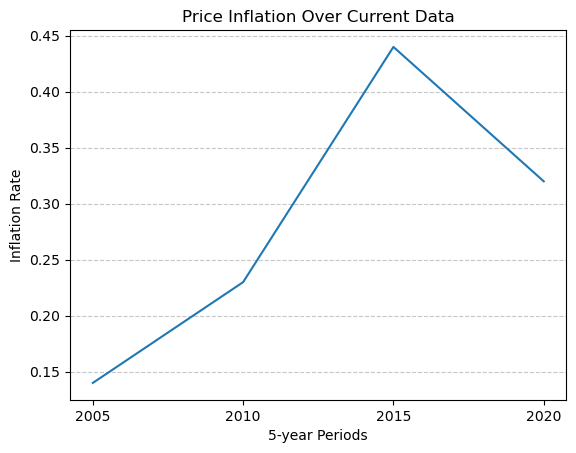

In [220]:
# Create a bar graph showing inflation over 5 year periods
years = [2005,2010,2015,2020]
plt.plot(years, inflation_rates, color='tab:blue')
plt.xlabel('5-year Periods')
plt.ylabel('Inflation Rate')
plt.title('Price Inflation Over Current Data')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


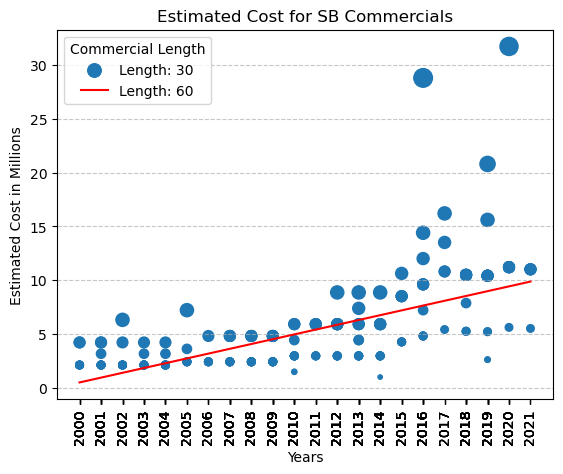

In [221]:
length = SB_Data['Length']
year_data = SB_Data['Year']
costs = SB_Data['Estimated Cost']
sizes = length

# Show linear regression
slope, intercept = np.polyfit(year_data, costs, 1)
regression_line = slope * year_data + intercept

# Create the scatter plot
plt.scatter(year_data, costs, s=sizes, color='tab:blue', label='Data')

# Plot the regression line
plt.plot(year_data, regression_line, color='red', label='Linear Regression')

plt.xlabel('Years')
plt.ylabel('Estimated Cost in Millions')
plt.title('Estimated Cost for SB Commercials')
plt.xticks(year_data, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a legend
legend_labels = [f'Length: {l}' for l in length.unique()]
legend_labels.append('Linear Regression')
plt.legend(legend_labels, title='Commercial Length')

plt.show()

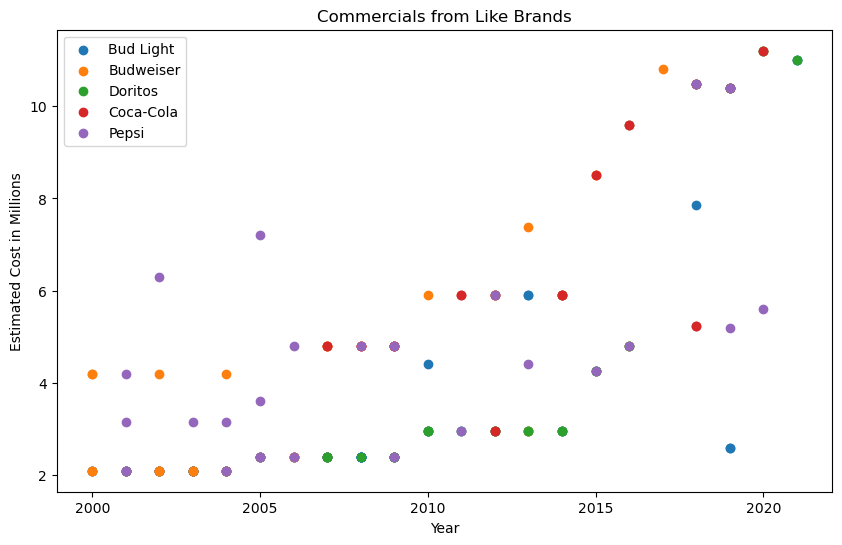

In [222]:
# Establish data
condition = SB_Data['Brand'].isin(['Bud Light', 'Budweiser', 'Doritos', 'Coca-Cola', 'Pepsi'])
FoodnBev_Data = SB_Data[condition]

# Separate data frames for each brand
bud_light_data = FoodnBev_Data[FoodnBev_Data['Brand'] == 'Bud Light']
budweiser_data = FoodnBev_Data[FoodnBev_Data['Brand'] == 'Budweiser']
doritos_data = FoodnBev_Data[FoodnBev_Data['Brand'] == 'Doritos']
coca_cola_data = FoodnBev_Data[FoodnBev_Data['Brand'] == 'Coca-Cola']
pepsi_data = FoodnBev_Data[FoodnBev_Data['Brand'] == 'Pepsi']
# Plotting each brand separately
plt.figure(figsize=(10, 6))

plt.scatter(bud_light_data['Year'], bud_light_data['Estimated Cost'], label='Bud Light')
plt.scatter(budweiser_data['Year'], budweiser_data['Estimated Cost'], label='Budweiser')
plt.scatter(doritos_data['Year'], doritos_data['Estimated Cost'], label='Doritos')
plt.scatter(coca_cola_data['Year'], coca_cola_data['Estimated Cost'], label='Coca-Cola')
plt.scatter(pepsi_data['Year'], pepsi_data['Estimated Cost'], label='Pepsi')

plt.xlabel('Year')
plt.ylabel('Estimated Cost in Millions')
plt.title('Commercials from Like Brands')
plt.legend()
plt.show()



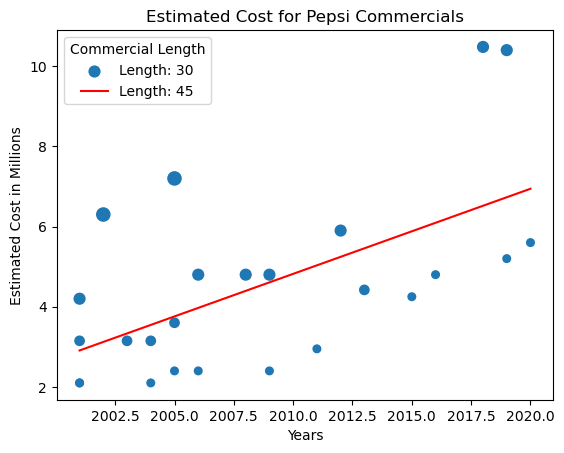

In [223]:
# Establish Pepsi data
condition2 = SB_Data['Brand'] == 'Pepsi'
Pepsi_Data = SB_Data[condition2]

# Extracting years and costs
years = Pepsi_Data['Year']
costs = Pepsi_Data['Estimated Cost']
length = Pepsi_Data['Length']
sizes = length
# Create a scatter plot
plt.scatter(years, costs, s=sizes, color='tab:blue', label='Data')

# Calculate linear regression
slope, intercept = np.polyfit(years, costs, 1)
regression_line = slope * years + intercept

# Plot the regression line
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Years')
plt.ylabel('Estimated Cost in Millions')
plt.title('Estimated Cost for Pepsi Commercials')

# Create a legend
legend_labels = [f'Length: {l}' for l in length.unique()]
legend_labels.append('Linear Regression')
plt.legend(legend_labels, title='Commercial Length')